In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split

In [21]:
from getdata import *

df_a = get_csvdata_ADNI(drop_MCI=False)
df_o= get_csvdata(drop_young=False, drop_contradictions=False)

In [22]:
df_o.shape

(436, 15)

In [23]:
imgs = get_slices_both(df_o["ID"], df_a["ID"], dim=0, m=95)

In [24]:
imgs.shape

(1267, 208, 176)

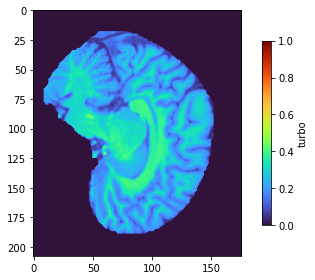

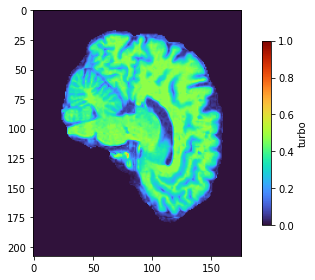

In [25]:
from matplotlib import animation


# generating gif out of slices of 3-dimensional numpy array
def generate_gif(numpy_3d_array, path="test.gif"):
    fig = plt.figure()
    im = plt.imshow(numpy_3d_array[0, :, :],    # display first slice
                    animated=True,
                    cmap='turbo',               # color mapping
                    vmin=0, # lowest value in numpy_3d_array
                    vmax=1) # highest value in numpy_3d_array
    plt.colorbar(label='turbo', shrink=0.75)
    plt.tight_layout()

    def init():
        im.set_data(numpy_3d_array[0, :, :])
        return im,

    def animate(i):
        im.set_array(numpy_3d_array[i, :, :])
        return im,

    # calling animation function of matplotlib
    anim = animation.FuncAnimation(fig,
                                   animate,
                                   init_func=init,
                                   frames=np.shape(numpy_3d_array)[0],  # amount of frames being animated
                                   interval=50,                       # update every x-milliseconds
                                   blit=True)
    anim.save(path)   # save as gif
    plt.show()

os.makedirs("./gifs/", exist_ok=True)
generate_gif(imgs[0:436], path="./gifs/sag_95_OASIS.gif")
generate_gif(imgs[437:1276], path="./gifs/sag_95_ADNI_new.gif")

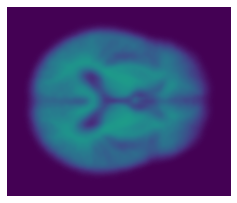

In [7]:
#img_a = get_slices_ADNI(df_a["ID"][:20], N=0, dim=2, normalize=True, m=100)
from EDA.EDA_functions import *
img_mean(imgs[437:863], vmax=1)

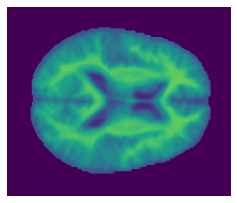

In [ ]:
img_o = get_slices(df_o["ID"][:20], N=0, dim=2, normalize=True, m=90)
img_mean(img_o, vmax=1)

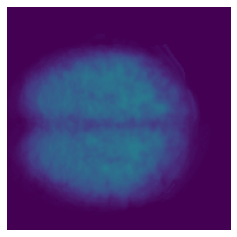

In [ ]:
img_a = get_slices_ADNI(df_a["ID"][:20], N=0, dim=1, normalize=True, m=60)
img_mean(img_a, vmax=1)

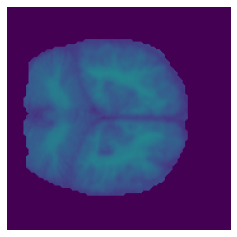

In [ ]:
img_o = get_slices(df_o["ID"][:20], N=0, dim=1, normalize=True, m=60)
img_mean(img_o, vmax=1)

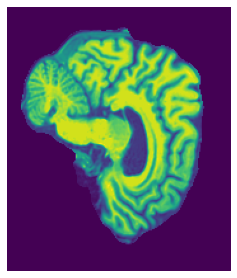

In [ ]:
img_a = get_slices_ADNI(df_a["ID"][:1], N=0, dim=0, normalize=True, m=85)
img_mean(img_a, vmax=1)

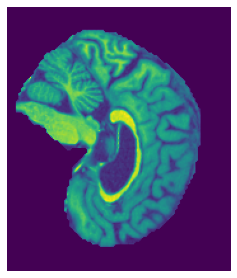

In [ ]:
img_o = get_slices(df_o["ID"][:1], N=0, dim=0, normalize=True, m=90)
img_mean(img_o, vmax=1)

In [ ]:
'''all_adni = get_slices_ADNI(df_a["ID"], N=0, dim=2, normalize=True, m=90)
all_adni.shape'''

'all_adni = get_slices_ADNI(df_a["ID"], N=0, dim=2, normalize=True, m=90)\nall_adni.shape'

In [ ]:
#img_mean(all_adni)

In [ ]:
#img_mean(all_adni[:,0:100,:])

In [ ]:
img = nib.load("../data/ADNI_Freesurfer/ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2006-04-18_08_20_30.0/I167590/002_S_0295-brainmask.mgz")
img = img.get_fdata()
img= np.array(img)

In [ ]:
img2 = img[35:211,15:191,10:218]
img2.shape

(176, 176, 208)

In [ ]:
imgs= get_3D_data_ADNI(df_a["ID"][:1])
img[0].shape

(256, 256)

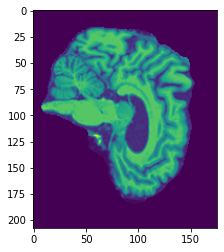

In [ ]:
plt.imshow(imgs[0,100])

In [ ]:
def find_img_mean(img):
    means=[]
    for i in range(img.shape[0]):
        (X, Y) = img.shape[1:3]
        m = np.zeros((X, Y))

        for x in range(X):
            for y in range(Y):
                m[x, y] = img[(i, x, y)] != 0
        m = m / np.sum(np.sum(m))

        # marginal distributions
        dx = np.sum(m, 1)
        dy = np.sum(m, 0)

        # expected values
        cx = np.sum(dx * np.arange(X)).astype(int)
        cy = np.sum(dy * np.arange(Y)).astype(int)
        means.append([cx,cy])

    return np.array(means)

In [ ]:
df_o= get_csvdata(drop_young=False, drop_contradictions=False)
imgs_o = get_slices(df_o["ID"], dim=2, m=90)

In [ ]:
means= find_img_mean(imgs_o)
means[0]

array([ 86, 103])

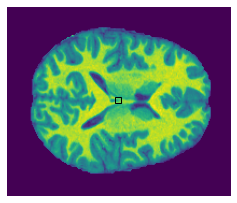

In [ ]:
img_mean([imgs_o[100]], box=[103-3, 103+3, 86-3, 86+3])

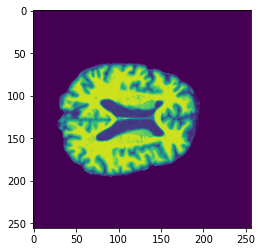

In [ ]:
img = nib.load("../data/ADNI_Freesurfer/ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2006-04-18_08_20_30.0/I167590/002_S_0295-brainmask.mgz")
img = img.get_fdata()
img = np.rot90(img, k=1, axes=(0,1))
plt.imshow(img[165])

In [ ]:
cy_o, cx_o, = 86,103
def get_slice_mean(img_a, slice=165):
    '''calculates mean in traverse plane'''
    (X, Y) = img.shape[1:3]
    m = np.zeros((X, Y))

    for x in range(X):
        for y in range(Y):
            m[x, y] = img[(slice, x, y)] != 0
    m = m / np.sum(np.sum(m))

    # marginal distributions
    dx = np.sum(m, 1)
    dy = np.sum(m, 0)

    # expected values
    cx = np.sum(dx * np.arange(X)).astype(int)
    cy = np.sum(dy * np.arange(Y)).astype(int)
    print(cy, cx)
    return cy, cx

In [ ]:
cy_a, cx_a = get_slice_mean(img, 165)

110 127


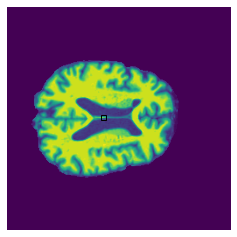

In [ ]:
img_mean([img[165]], box=[110-3, 110+3, 127-3, 127+3])

In [ ]:
img_165= img[165]


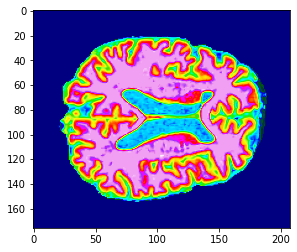

In [ ]:
cropped_img = img_165[(cx_a-cy_o) : (cx_a-cy_o+176), (cy_a-cx_o) : (cy_a-cx_o+208)]
plt.imshow(cropped_img, cmap="gist_ncar")

In [ ]:
(X, Y) = cropped_img.shape[0:2]
m = np.zeros((X, Y))

for x in range(X):
    for y in range(Y):
        m[x, y] = cropped_img[(x, y)] != 0
m = m / np.sum(np.sum(m))

# marginal distributions
dx = np.sum(m, 1)
dy = np.sum(m, 0)

# expected values
cx = np.sum(dx * np.arange(X)).astype(int)
cy = np.sum(dy * np.arange(Y)).astype(int)
print(cy, cx)

103 86


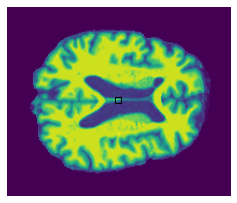

In [ ]:
img_mean([cropped_img], box=[103-3, 103+3, 86-3, 86+3])

In [ ]:
def crop_adni3D_trav(img):
    '''calculates mean in traverse plane'''
    cy_o, cx_o, = 86,103
    (X, Y) = img.shape[1:3]
    m = np.zeros((X, Y))

    for x in range(X):
        for y in range(Y):
            m[x, y] = img[(165, x, y)] != 0
    m = m / np.sum(np.sum(m))

    # marginal distributions
    dx = np.sum(m, 1)
    dy = np.sum(m, 0)

    # expected values
    cx_a = np.sum(dx * np.arange(X)).astype(int)
    cy_a = np.sum(dy * np.arange(Y)).astype(int)
    
    img_crop = img[:, (cx_a-cy_o) : (cx_a-cy_o+176), (cy_a-cx_o) : (cy_a-cx_o+208)]

    return img_crop

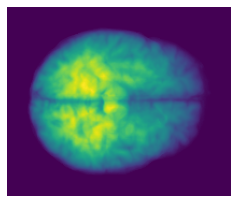

In [ ]:
img = nib.load("../data/ADNI_Freesurfer/ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2006-04-18_08_20_30.0/I167590/002_S_0295-brainmask.mgz")
img = img.get_fdata()
img = np.rot90(img, k=1, axes=(0,1))
img_crop=crop_adni3D_trav(img)
img_mean(img_crop)

In [ ]:
img_crop.shape

(256, 176, 208)

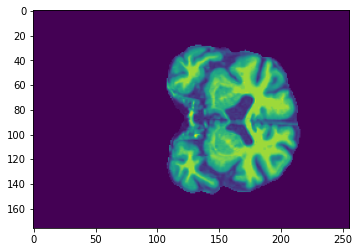

In [ ]:
img_cort = np.rot90(img_crop, k=1, axes=(0,1))
plt.imshow(img_cort[:,:,130])

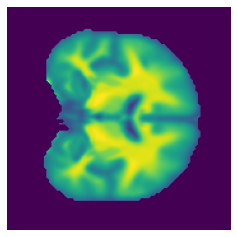

In [ ]:
imgs_o = get_slices(df_o["ID"], dim=1, m=110)
img_mean(imgs_o)

In [ ]:
means= find_img_mean(imgs_o)

In [ ]:
means[100]
cx_o, cy_o = 88, 86

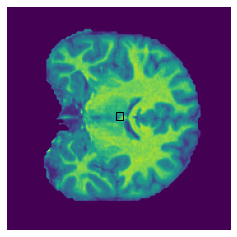

In [ ]:
img_mean([imgs_o[100]], box=[88-3, 88+3, 86-3, 86+3])

In [ ]:
(X, Y) = img_cort.shape[0:2]
m = np.zeros((X, Y))

for x in range(X):
    for y in range(Y):
        m[x, y] = img_cort[(x, y, 130)] != 0
m = m / np.sum(np.sum(m))

# marginal distributions
dx = np.sum(m, 1)
dy = np.sum(m, 0)

# expected values
cx_a = np.sum(dx * np.arange(X)).astype(int)
cy_a = np.sum(dy * np.arange(Y)).astype(int)
print(cy, cx)


158 88


In [ ]:
img_c130.shape

(176, 256)

In [ ]:
img_c130 = img_cort[:,:,130]

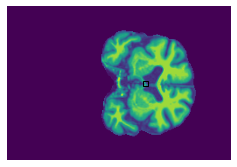

In [ ]:
img_mean([img_c130], box=[158-3, 158+3, 88-3, 88+3])

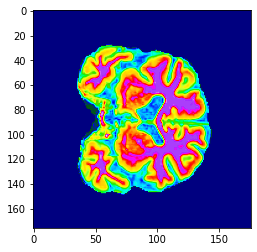

In [ ]:
cropped_img = img_c130[:,cy_a-cy_o:cy_a-cy_o+176]
plt.imshow(cropped_img, cmap="gist_ncar")

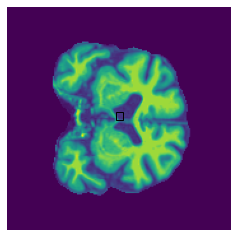

In [ ]:
img_mean([cropped_img], box=[88-3, 88+3, 86-3, 86+3])

In [ ]:
def crop_adni3D_cort(img):
    '''crops an ADNI 3D image to fit the brain center in slice 130 with the center of the OASIS images'''
    
    cy_o, cx_o, = 86, 88
    (X, Y) = img.shape[1:3]
    m = np.zeros((X, Y))
    for x in range(X):
        for y in range(Y):
            m[x, y] = img[(130, x, y)] != 0
    m = m / np.sum(np.sum(m))

    dx = np.sum(m, 1)
    dy = np.sum(m, 0)

    cx_a = np.sum(dx * np.arange(X)).astype(int)
    cy_a = np.sum(dy * np.arange(Y)).astype(int)
    img_crop = img[:, :, cy_a-cy_o : cy_a-cy_o+176]

    return img_crop


(256, 256, 256)
(256, 256, 256)
(256, 176, 208)
(208, 176, 256)
(208, 176, 176)


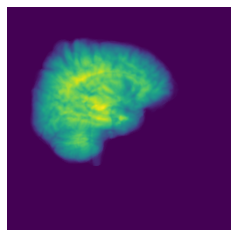

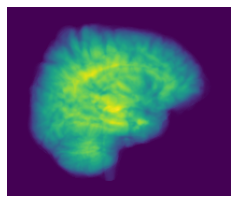

In [ ]:
img = nib.load("../data/ADNI_Freesurfer/ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2006-04-18_08_20_30.0/I167590/002_S_0295-brainmask.mgz")
img = img.get_fdata()
print(img.shape)
img_mean(img)

img = np.rot90(img, k=1, axes=(0,1))
print(img.shape)
#img_mean(img)

img_crop=crop_adni3D_trav(img)
print(img_crop.shape)
#img_mean(img_crop)
img_crop = np.rot90(img_crop, k=1, axes=(0,2))
print(img_crop.shape)
#img_mean(img_crop)

img_crop=crop_adni3D_cort(img_crop)
print(img_crop.shape)
img_crop = np.rot90(img_crop, k=3, axes=(0,2))
img_crop = np.rot90(img_crop, k=3, axes=(0,1))
img_mean(img_crop)

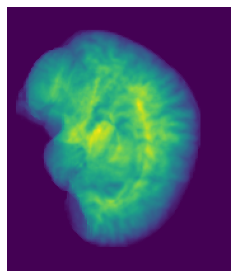

In [ ]:
img_o = nib.load("../data/Oasis_Data/OAS1_0001_MR1/PROCESSED/MPRAGE/T88_111/OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc.img")
img_o = img_o.get_fdata()
img_o.shape
img_mean(img_o[:,:,:,0])

ValueError: Axes=(0, 1) out of range for array of ndim=0.